Ayoola Ogunbona <br>
Cody Padlo <br>
Soraya Karimi <br>

MSDS 422 <br>
Professor Anil Chaturvedi

# Module 1 Assignment 1: Housing Price Indicators

# Import Libraries

In [1]:
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
import tensorflow as tf
import tensorflow_decision_forests as tfdf

In [2]:
#%matplotlib inline

In [3]:
print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)

TensorFlow v2.18.0
TensorFlow Decision Forests v1.11.0


# Mount Google Drive

In [4]:
 # note that the shared folder has to be added as a shortcut to "My Drive"
 drive.mount('/content/drive')
 project_path = '/content/drive/My Drive/NU | MSDS 422 | Group 3/Assignments/Assignment 1: Housing Price Indicators/'

Mounted at /content/drive


# Load Data

In [5]:
train_file_path = project_path + "house-prices-advanced-regression-techniques/train.csv"
dataset_df = pd.read_csv(train_file_path)
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (1460, 81)


# Initial Review

## Descriptive Statistics

1. Provide appropriate descriptive statistics and visualizations to help understand the marginal distribution of the dependent variable.

In [6]:
dataset_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
for column in dataset_df.columns:
  print(column)
  print(dataset_df[column].describe())

Id
count    1460.000000
mean      730.500000
std       421.610009
min         1.000000
25%       365.750000
50%       730.500000
75%      1095.250000
max      1460.000000
Name: Id, dtype: float64
MSSubClass
count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
MSZoning
count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object
LotFrontage
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
LotArea
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64
Street
count     1460
unique       2
top       Pave
freq 

## Preliminary Correlation Investigation

We are using variable "SalePrice" as the dependent variable. We specifically determine correlation to this variable, first.

In [9]:
corr = dataset_df[['SalePrice',
                   'OverallQual', 'OverallCond',
                   'LotArea',
                   'YearBuilt', 'YearRemodAdd',
                   'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                   '1stFlrSF', '2ndFlrSF',
                   'GrLivArea',
                   'BsmtFullBath', 'BsmtHalfBath',
                   'FullBath', 'HalfBath',
                   'BedroomAbvGr', 'TotRmsAbvGrd',
                   'Fireplaces', 'MasVnrArea',
                   'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch',
                   'GarageYrBlt', 'GarageCars', 'GarageArea']].corr()

<Axes: >

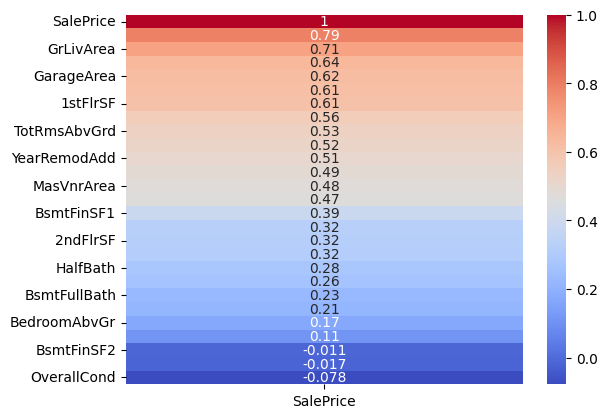

In [10]:
sns.heatmap(corr[['SalePrice']].sort_values(by='SalePrice', ascending=False), cmap="coolwarm", annot=True)

We can see that the numerical variables GrLivArea, GarageArea, 1stFlrSF, and YearRemodAdd are a few variables that are positively and strongly correlated with Sales Price. A scatterplot can be used to better visualize the relationship between each of these chosen three variables and SalesPrice

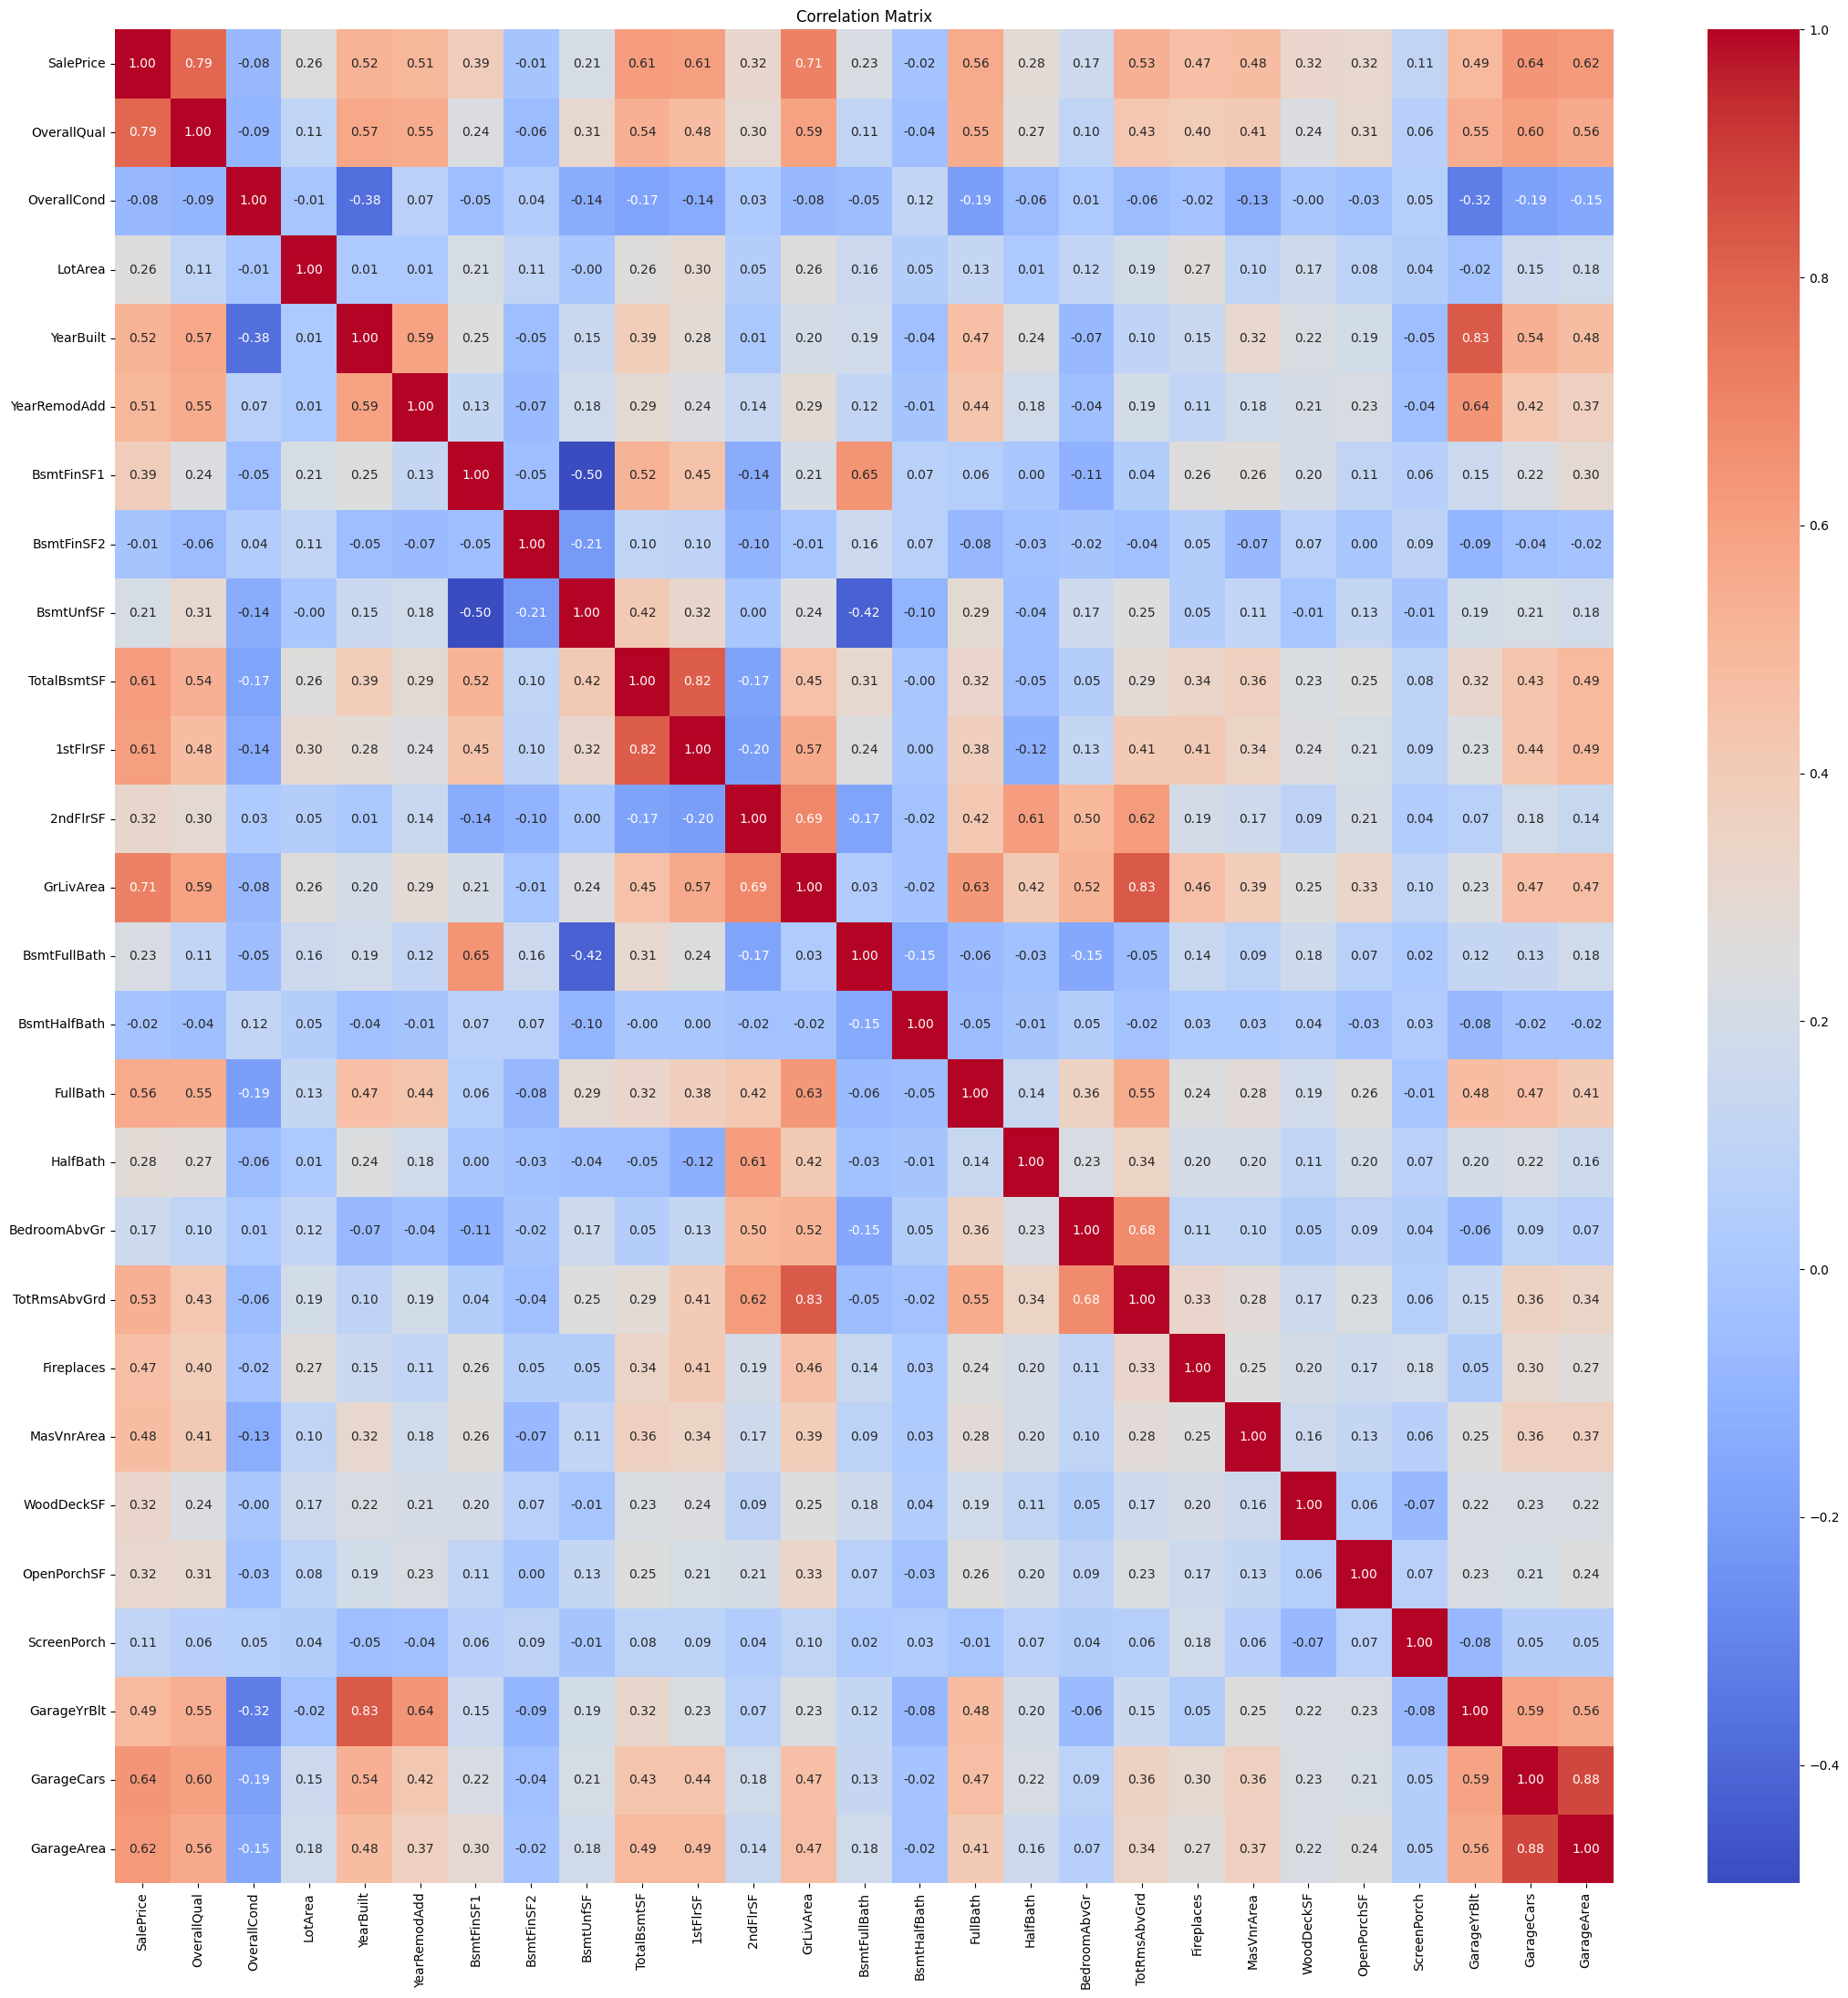

In [11]:
plt.figure(figsize=(22, 22))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

## Outlier Analysis

In [12]:
columns = ('SalePrice',
           'OverallQual', 'OverallCond',
           'LotArea',
           'YearBuilt', 'YearRemodAdd',
           'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
           '1stFlrSF', '2ndFlrSF',
           'GrLivArea',
           'BsmtFullBath', 'BsmtHalfBath',
           'FullBath', 'HalfBath',
           'BedroomAbvGr', 'TotRmsAbvGrd',
           'Fireplaces', 'MasVnrArea',
           'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch',
           'GarageYrBlt', 'GarageCars', 'GarageArea'
          )

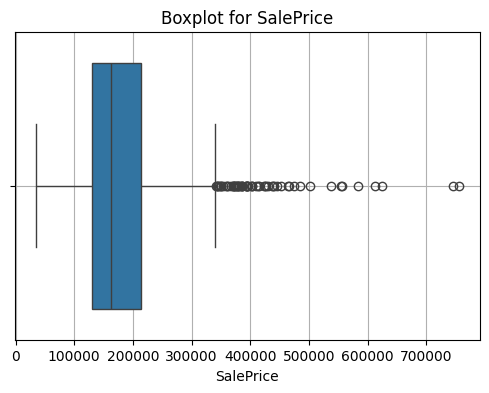

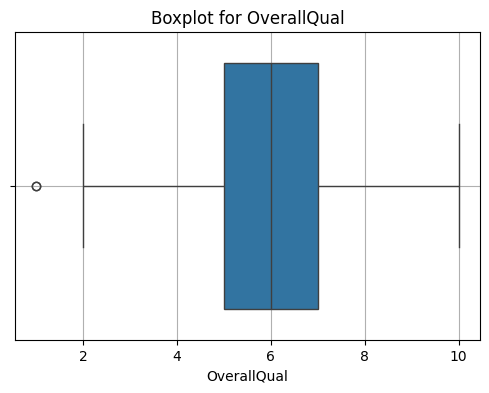

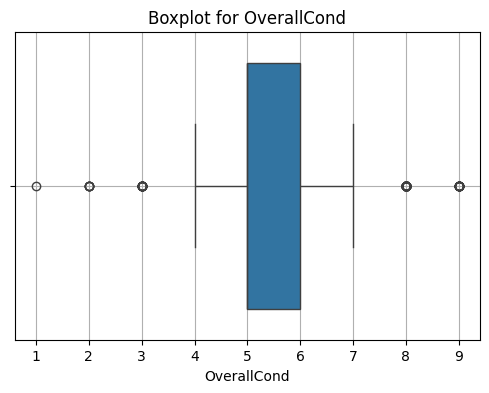

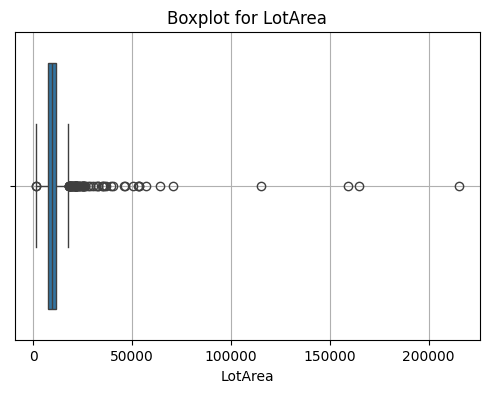

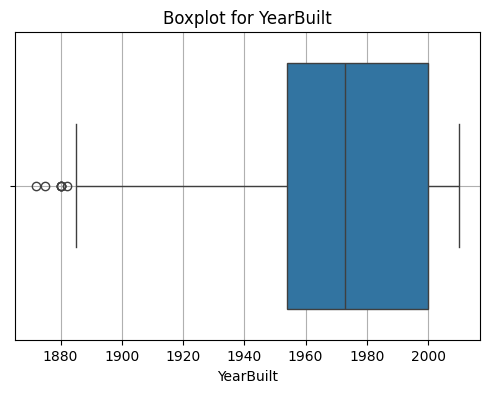

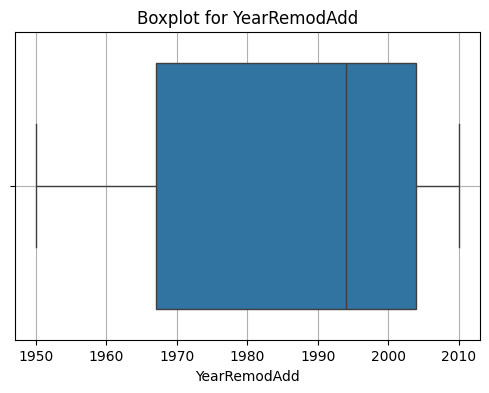

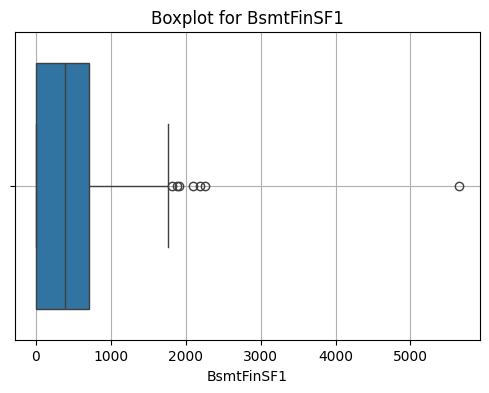

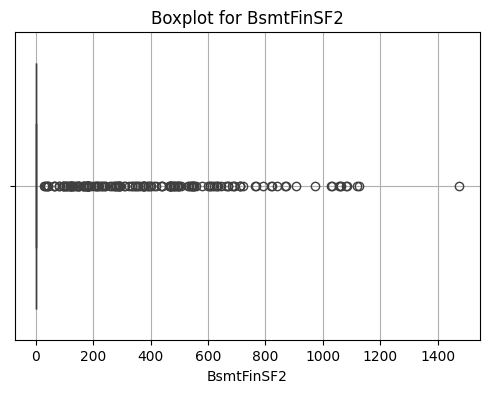

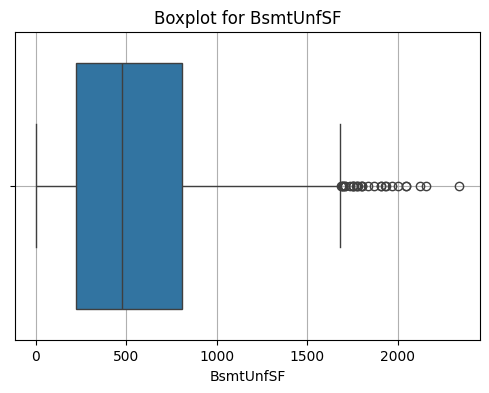

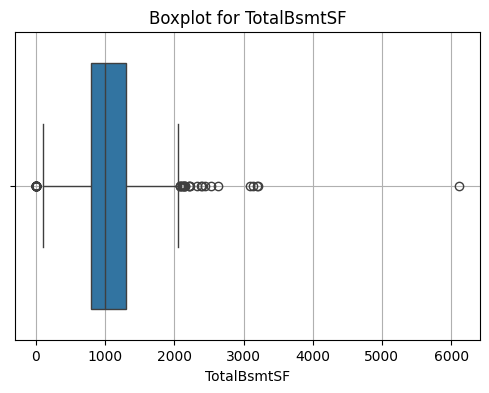

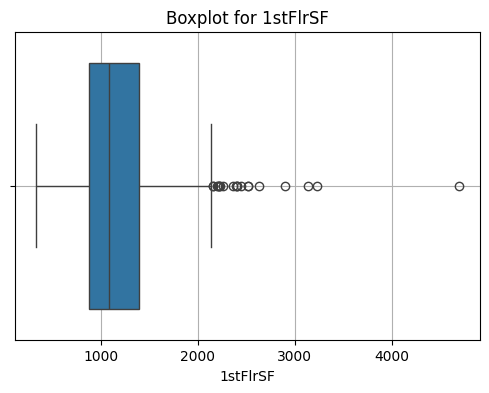

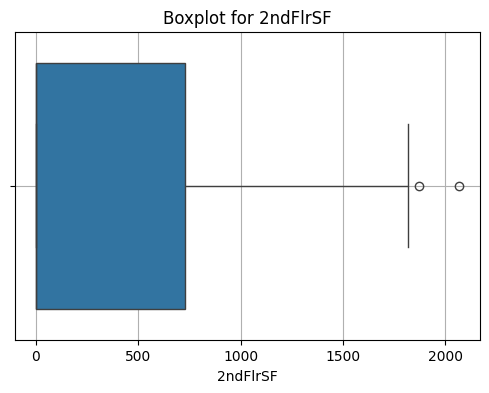

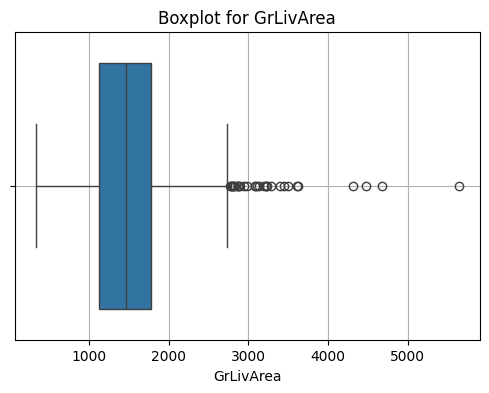

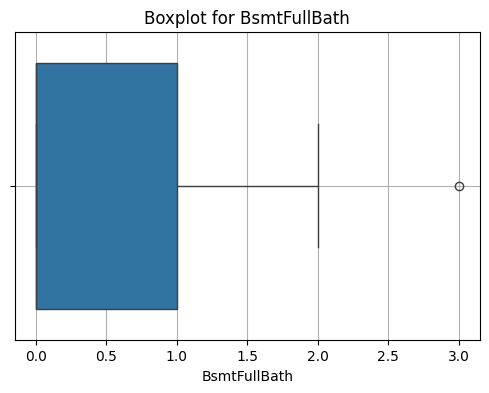

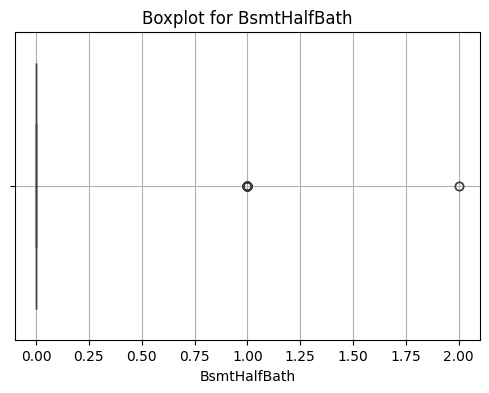

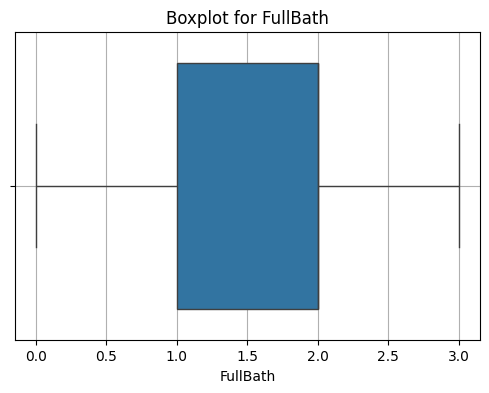

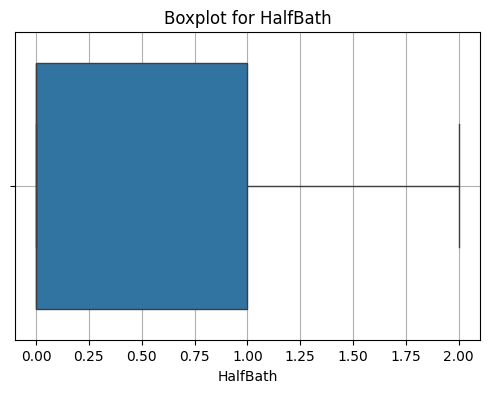

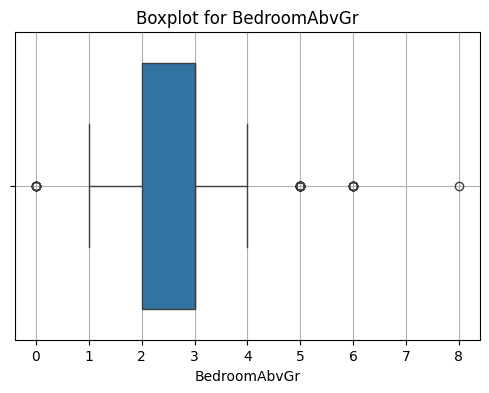

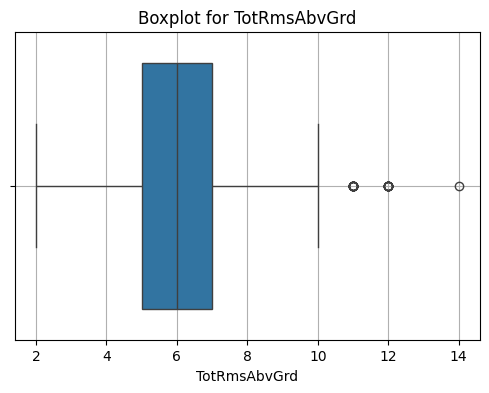

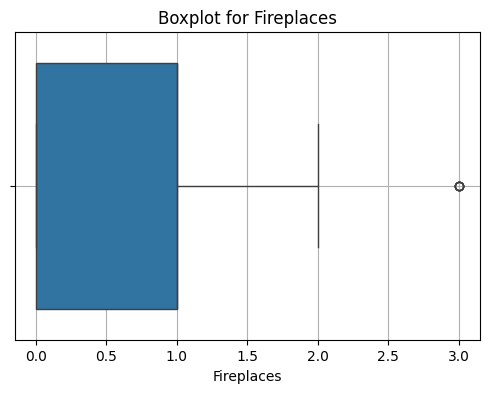

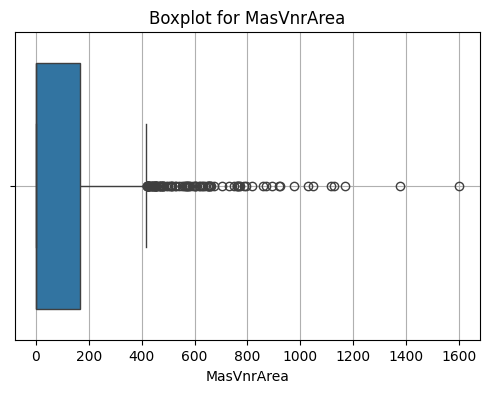

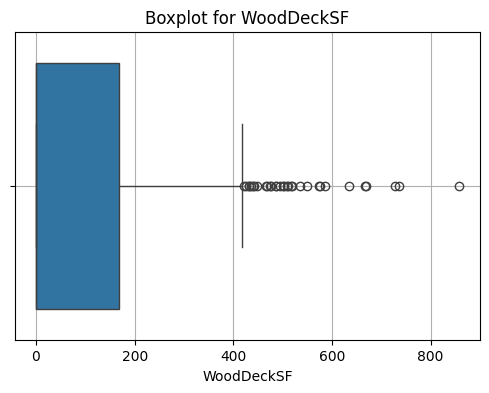

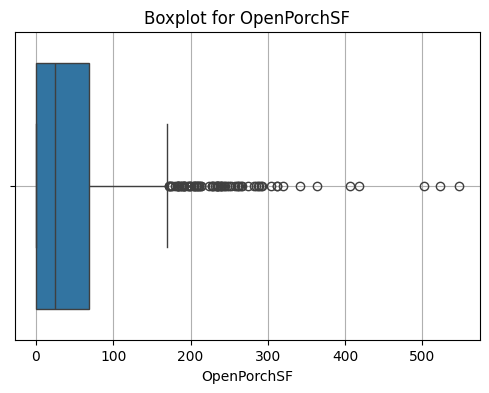

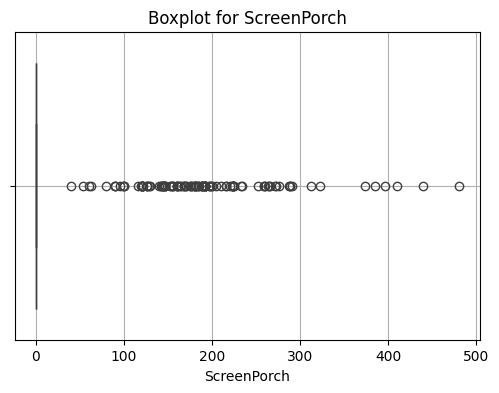

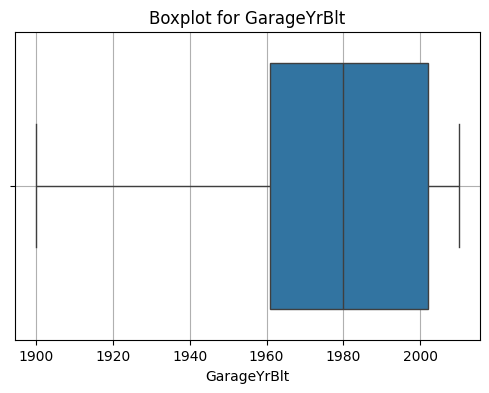

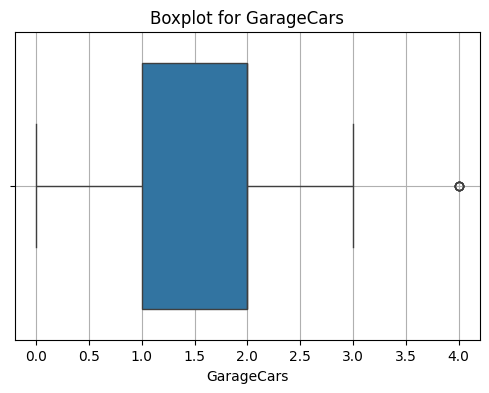

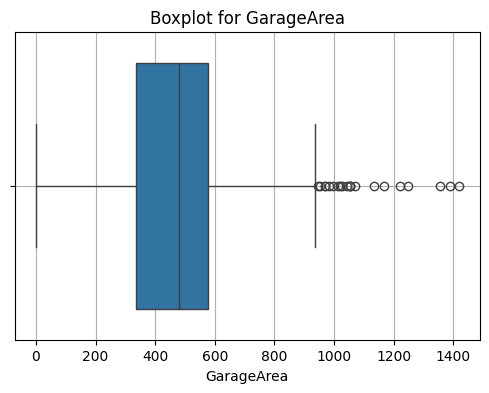

In [13]:
for col in columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=dataset_df[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

# Variable Selection

In [14]:
eval_var = ["GrLivArea","GarageArea","1stFlrSF","YearRemodAdd"]

# Descriptive Statistics - With Selected Variables

In [15]:
dataset_df[["SalePrice","GrLivArea","GarageArea","1stFlrSF","YearRemodAdd"]]

,SalePrice,GrLivArea,GarageArea,1stFlrSF,YearRemodAdd
0,208500,1710,548,856,2003
1,181500,1262,460,1262,1976
2,223500,1786,608,920,2002
3,140000,1717,642,961,1970
4,250000,2198,836,1145,2000
...,...,...,...,...,...
1455,175000,1647,460,953,2000
1456,210000,2073,500,2073,1988
1457,266500,2340,252,1188,2006
1458,142125,1078,240,1078,1996


In [16]:
for var in eval_var:
    print(var)
    print(dataset_df[var].head())
    print(dataset_df[var].info())
    print(dataset_df[var].describe())

GrLivArea
0    1710
1    1262
2    1786
3    1717
4    2198
Name: GrLivArea, dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: GrLivArea
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
None
count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64
GarageArea
0    548
1    460
2    608
3    642
4    836
Name: GarageArea, dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: GarageArea
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
None
count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64
1stFlrSF
0 

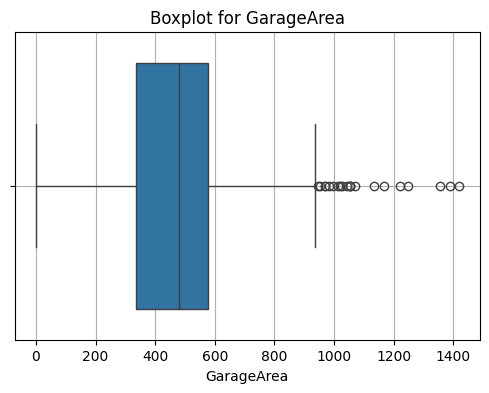

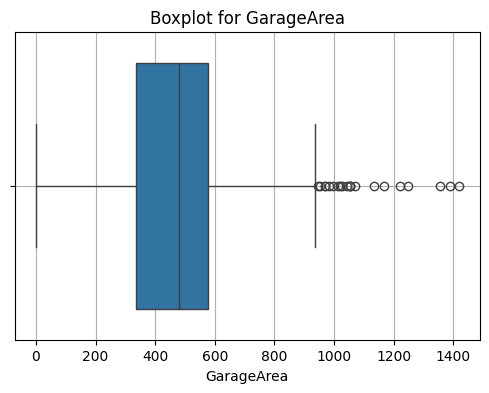

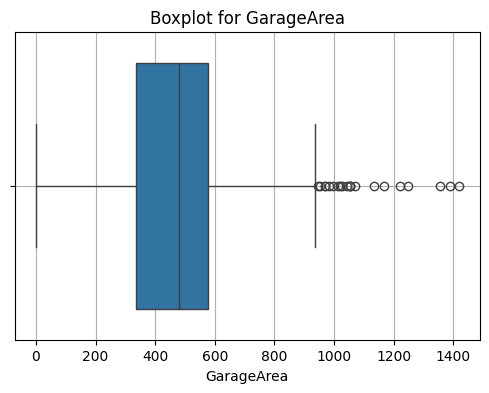

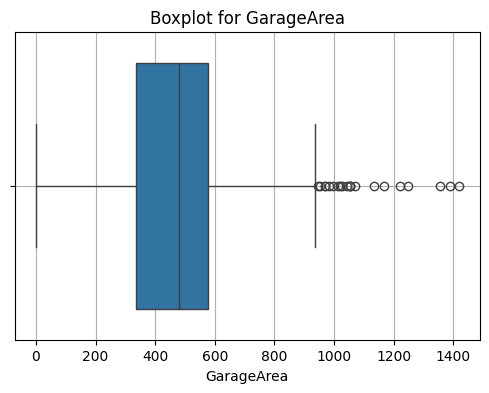

In [17]:
for var in eval_var:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=dataset_df[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

# Regression Review: Potential Predictors

In [18]:

f_scores, p_values  = f_regression(dataset_df[eval_var], dataset_df["SalePrice"])

In [19]:
eval_table = pd.DataFrame({"variable":eval_var,
                          "f_scores":f_scores,
                          "p_scores":p_values})
eval_table

,variable,f_scores,p_scores
0,GrLivArea,1470.585010,4.518034e-223
1,GarageArea,926.951287,5.265038e-158
2,1stFlrSF,845.524488,5.394711e-147
3,YearRemodAdd,504.714855,3.164948e-96


Using this multiple regression model, we can see that the p values for our potential predictors are very small, so we would identify these variables as potentially significant predictors. The p value provides evidence for whether the affect of potential predictors on SalesPrice could have been produced by chance, and since all p values are very small, we can conclude that these variables do affect SalesPrice in an important way.

 We will continue our analysis of these four variables. We can generate a linear regression model to determine the p-values of potential predictors and evaluate their potential for further use.

# Scatterplot Review: Potential Predictors

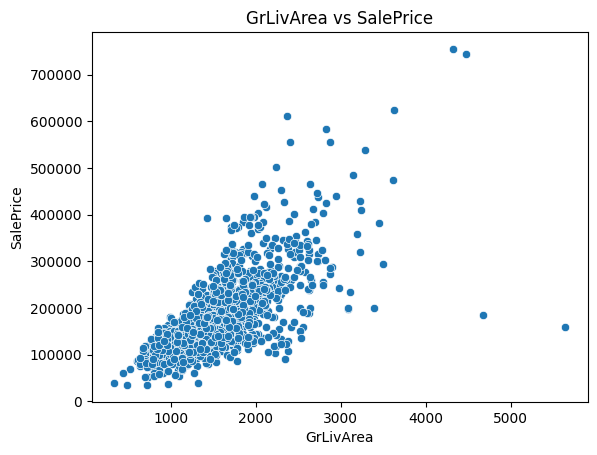

In [20]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=dataset_df)
plt.title('GrLivArea vs SalePrice')
plt.show()

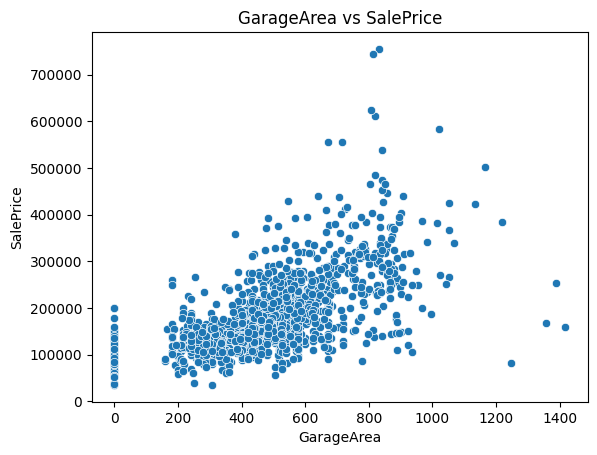

In [21]:
sns.scatterplot(x='GarageArea', y='SalePrice', data=dataset_df)
plt.title('GarageArea vs SalePrice')
plt.show()


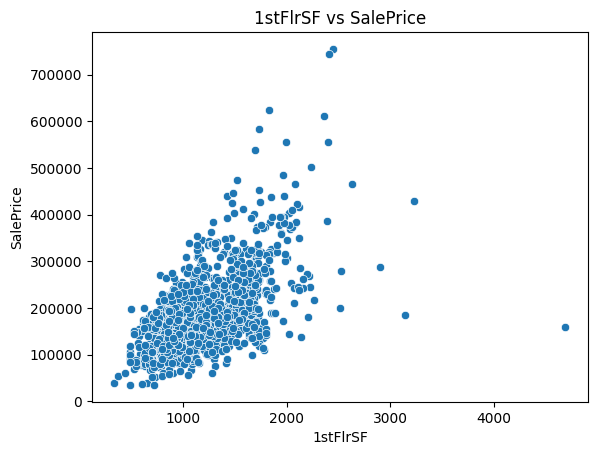

In [22]:
sns.scatterplot(x='1stFlrSF', y='SalePrice', data=dataset_df)
plt.title('1stFlrSF vs SalePrice')
plt.show()

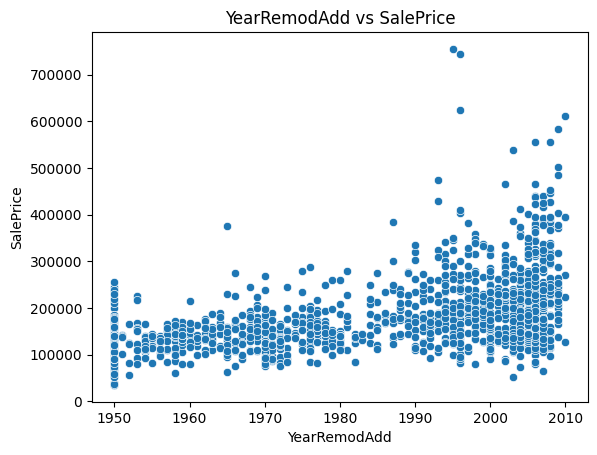

In [23]:
sns.scatterplot(x='YearRemodAdd', y='SalePrice', data=dataset_df)
plt.title('YearRemodAdd vs SalePrice')
plt.show()

# Feature Exploration & Creation

We will create new features to improve our regression model. These features are based on simple ideas, like the age of a house and whether it has a pool. We will:  
- Make three new variables: `AgeOfHouse`, `Remodeled`, and `HasPool`  
- Check their values  
- Show their distributions in a graph  

In [24]:
df_features = dataset_df.copy()
df_features.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:
# How old the house was when sold
df_features['AgeOfHouse'] = df_features['YrSold'] - df_features['YearBuilt']
print("Age of House (first 5 values):")
print(df_features['AgeOfHouse'].head())


Age of House (first 5 values):
0     5
1    31
2     7
3    91
4     8
Name: AgeOfHouse, dtype: int64


In [26]:
#  Remodeled or not(1 if remodeled, 0 otherwise)
df_features['Remodeled'] = (df_features['YearRemodAdd'] != df_features['YearBuilt']).astype(int)
print("Remodeled Value Counts:")
print(df_features['Remodeled'].value_counts())


Remodeled Value Counts:
Remodeled
0    764
1    696
Name: count, dtype: int64


In [27]:
# HasPool or not (1 if PoolArea > 0, else 0)
df_features['HasPool'] = df_features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

print("Has Pool Value Counts:")
print(df_features['HasPool'].value_counts())

Has Pool Value Counts:
HasPool
0    1453
1       7
Name: count, dtype: int64


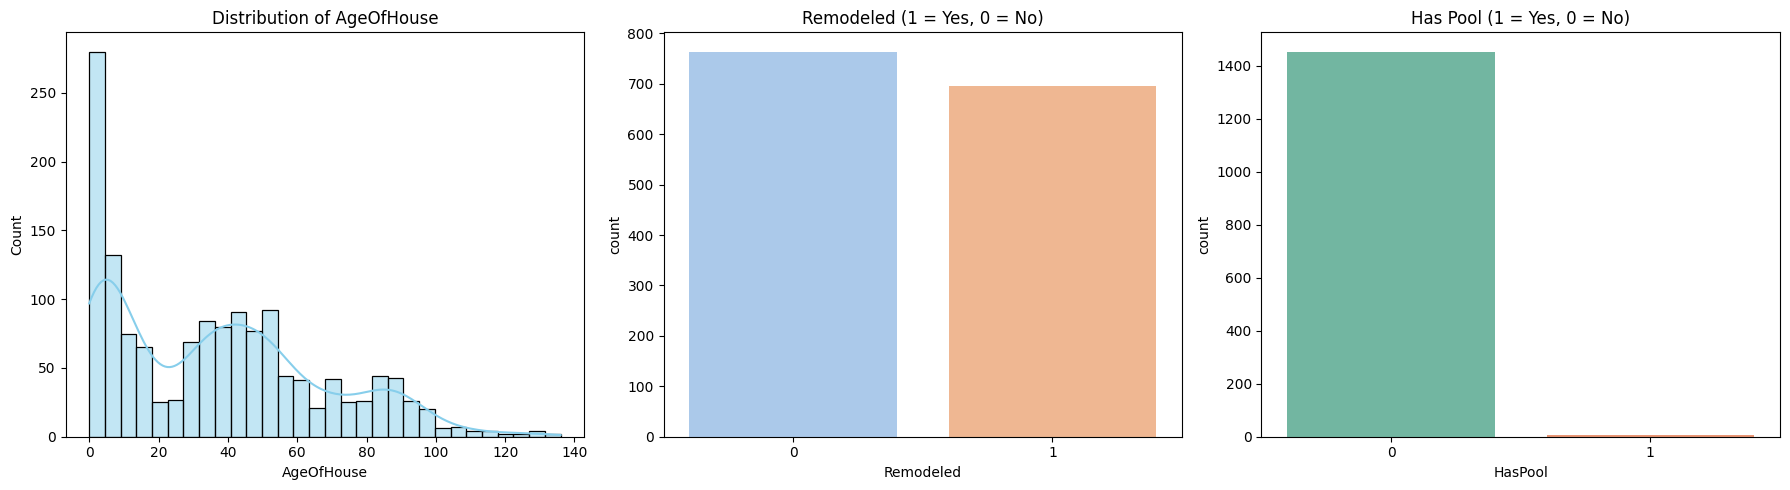

In [28]:
plt.figure(figsize=(18, 5))

# AgeOfHouse
plt.subplot(1, 3, 1)
sns.histplot(df_features['AgeOfHouse'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of AgeOfHouse')

# Remodeled
plt.subplot(1, 3, 2)
sns.countplot(x='Remodeled', hue='Remodeled', data=df_features, palette='pastel', legend=False)
plt.title('Remodeled (1 = Yes, 0 = No)')

# HasPool
plt.subplot(1, 3, 3)
sns.countplot(x='HasPool',hue='HasPool', data=df_features, palette='Set2',legend=False)
plt.title('Has Pool (1 = Yes, 0 = No)')

plt.tight_layout()
plt.show()

In [29]:
# Creating more features like 'TotalSqFeet' by adding basement, 1st and 2nd floor areas
dataset_df['TotalSqFeet'] = dataset_df['TotalBsmtSF'] + dataset_df['1stFlrSF'] + dataset_df['2ndFlrSF']

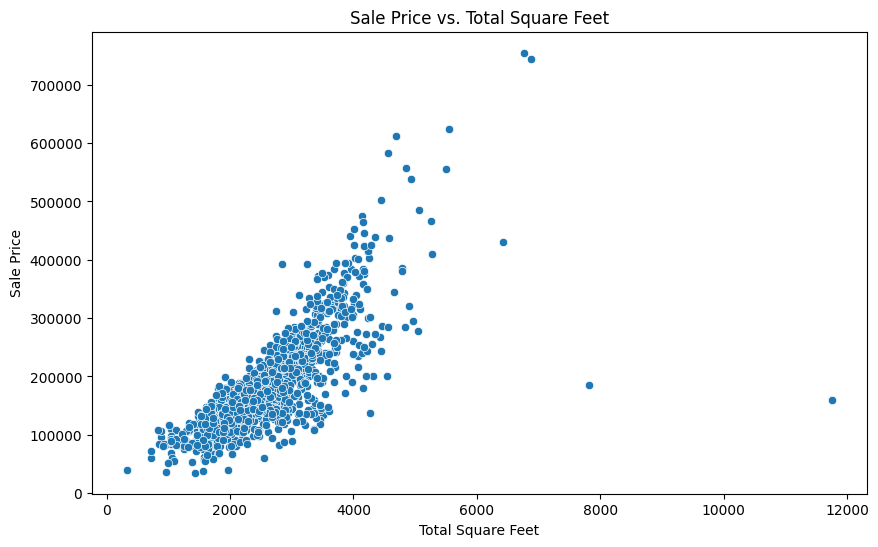

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dataset_df['TotalSqFeet'], y=dataset_df['SalePrice'])
plt.title('Sale Price vs. Total Square Feet')
plt.xlabel('Total Square Feet')
plt.ylabel('Sale Price')
plt.show()

- **Age of House:** Most homes sold are relatively new, under 30 years old, with a few older properties. This shows that newer homes are more common in the market.

- **Remodeled:** There is a nearly equal number of remodeled homes (696) and homes that have not been remodeled (764). Remodeling may suggest updates or repairs that can affect how buyers see the home and its price.

- **Has Pool:** Only 7 homes have pools, making this a rare luxury feature. It serves as a simple indicator that helps identify unusual pricing.

- **Total Square Feet vs. Sale Price:** Bigger homes usually sell for higher prices, which confirms what we expect. However, there is a lot of price variation, especially among larger homes, indicating that other factors like location, condition, or features also play a role in pricing.

# Scaling: MinMax

In [31]:
from sklearn.preprocessing import MinMaxScaler

# Numeric columns
columns = ['SalePrice',
           'OverallQual', 'OverallCond',
           'LotArea',
           'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
           '1stFlrSF', '2ndFlrSF',
           'GrLivArea',
           'BsmtFullBath', 'BsmtHalfBath',
           'FullBath', 'HalfBath',
           'BedroomAbvGr', 'TotRmsAbvGrd',
           'Fireplaces', 'MasVnrArea',
           'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch',
           'GarageYrBlt', 'GarageCars', 'GarageArea'
]
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
df_scaled_minmax = pd.DataFrame(scaler.fit_transform(dataset_df[columns]), columns=columns)
print("Min-Max Scaled Data:")
df_scaled_minmax.head()

Min-Max Scaled Data:


,SalePrice,OverallQual,OverallCond,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,MasVnrArea,WoodDeckSF,OpenPorchSF,ScreenPorch,GarageYrBlt,GarageCars,GarageArea
0,0.241078,0.666667,0.500,0.033420,0.125089,0.0,0.064212,0.140098,0.119780,0.413559,...,0.375,0.500000,0.000000,0.12250,0.000000,0.111517,0.0,0.936364,0.50,0.386460
1,0.203583,0.555556,0.875,0.038795,0.173281,0.0,0.121575,0.206547,0.212942,0.000000,...,0.375,0.333333,0.333333,0.00000,0.347725,0.000000,0.0,0.690909,0.50,0.324401
2,0.261908,0.666667,0.500,0.046507,0.086109,0.0,0.185788,0.150573,0.134465,0.419370,...,0.375,0.333333,0.333333,0.10125,0.000000,0.076782,0.0,0.918182,0.50,0.428773
3,0.145952,0.666667,0.500,0.038561,0.038271,0.0,0.231164,0.123732,0.143873,0.366102,...,0.375,0.416667,0.333333,0.00000,0.000000,0.063985,0.0,0.890909,0.75,0.452750
4,0.298709,0.777778,0.500,0.060576,0.116052,0.0,0.209760,0.187398,0.186095,0.509927,...,0.500,0.583333,0.333333,0.21875,0.224037,0.153565,0.0,0.909091,0.75,0.589563


In [32]:
# get range over all values
print("Overall Max:", df_scaled_minmax.max().max())
print("Overall Min:", df_scaled_minmax.min().min())

Overall Max: 1.0
Overall Min: 0.0


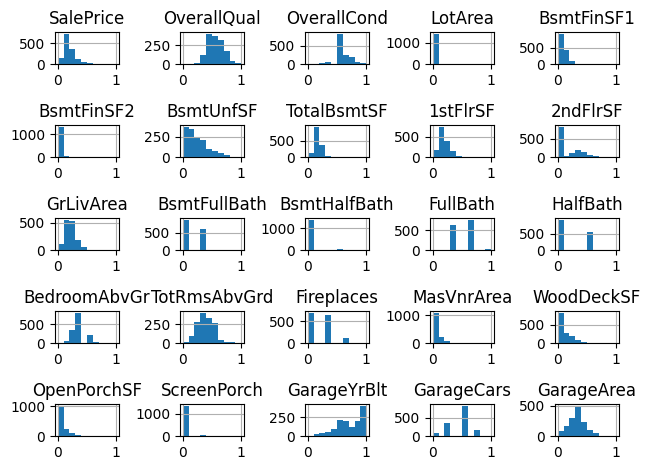

In [33]:
df_scaled_minmax.hist()
plt.tight_layout()
plt.show()

# Scaling: Standardization

In [34]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df_scaled_standard = pd.DataFrame(scaler.fit_transform(dataset_df[columns]), columns=columns)
print("Standard Scaled Data:")
df_scaled_standard.head()

Standard Scaled Data:


,SalePrice,OverallQual,OverallCond,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,MasVnrArea,WoodDeckSF,OpenPorchSF,ScreenPorch,GarageYrBlt,GarageCars,GarageArea
0,0.347273,0.651479,-0.517200,-0.207142,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,...,0.163779,0.912210,-0.951226,0.510015,-0.752176,0.216503,-0.270208,0.992426,0.311725,0.351000
1,0.007288,-0.071836,2.179628,-0.091886,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,...,0.163779,-0.318683,0.600495,-0.572835,1.626195,-0.704483,-0.270208,-0.101543,0.311725,-0.060731
2,0.536154,0.651479,-0.517200,0.073480,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,...,0.163779,-0.318683,0.600495,0.322174,-0.752176,-0.070361,-0.270208,0.911391,0.311725,0.631726
3,-0.515281,0.651479,-0.517200,-0.096897,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,...,0.163779,0.296763,0.600495,-0.572835,-0.752176,-0.176048,-0.270208,0.789839,1.650307,0.790804
4,0.869843,1.374795,-0.517200,0.375148,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,...,1.390023,1.527656,0.600495,1.360826,0.780197,0.563760,-0.270208,0.870874,1.650307,1.698485


In [35]:
# get range over all values
print("Overall Max:", df_scaled_standard.max().max())
print("Overall Min:", df_scaled_standard.min().min())

Overall Max: 20.51827315777325
Overall Min: -4.112969893342749


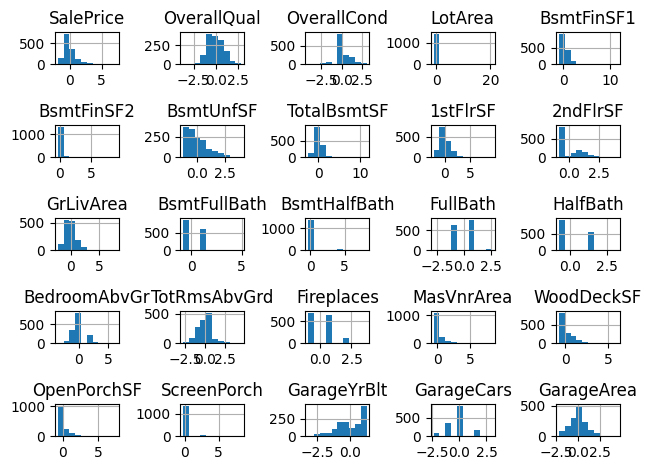

In [36]:
df_scaled_standard.hist()
plt.tight_layout()
plt.show()